In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using DifferentialEquations

In [3]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel


## Initialization

In [4]:
    ω0 = [sqrt(1.2e004)];
#     ℘ = [1.2e005];

    ℘ = [1.2e10];


    Θ = 0.15;
    θe = 1 + Θ;
    θc = 1 - Θ;
    
    He = 3000.0;
    Hc = 3000.0;


    γ = 1.30;

In [5]:
    L = 2.0  # total length of the pipe when streched to a 1D pipe    
    # L = 4.0  

    L2D = 2.0 # the actual length of the bended pipe in the real world

    #inclination angle 
    alpha = 0 # pi/2


0

In [6]:
tube = Tube(L,L2D,alpha)

Tube(2.0, 2.0, 0.0)

In [7]:
Xe = map(tuple, [0.0], [1.0])
evap = Evaporator(He,θe,Xe)

Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0)])

In [8]:
Xc = map(tuple, [0.0], [0.0])
cond = Condenser(Hc,θc,Xc)

Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(0.0, 0.0)])

In [9]:
X0 = [(1.0,1.0+1e-5)]
dXdt0 = [(0.0,0.0)]
liquids=LiquidSlug(γ,ω0,℘,X0,dXdt0)

LiquidSlug(1.3, [109.54451150103323], [1.2e10], Tuple{Float64,Float64}[(1.0, 1.00001)], Tuple{Float64,Float64}[(0.0, 0.0)])

In [10]:
P = [1.0,1.0]
Lvaporplug = XptoLvaporplug(X0,L)
M = P.^(1/γ).* Lvaporplug

vapors=VaporPlug(γ,P)

VaporPlug(1.3, [1.0, 1.0])

In [11]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors)

PHPSystem(Tube(2.0, 2.0, 0.0), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0)]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(0.0, 0.0)]), LiquidSlug(1.3, [109.54451150103323], [1.2e10], Tuple{Float64,Float64}[(1.0, 1.00001)], Tuple{Float64,Float64}[(0.0, 0.0)]), VaporPlug(1.3, [1.0, 1.0]))

In [12]:
typeof(sys0)

PHPSystem

## Get numerical solution

In [13]:
sys0.liquidslug.Xp
sys0.liquidslug.dXdt

1-element Array{Tuple{Float64,Float64},1}:
 (0.0, 0.0)

In [14]:
u=XMtovec(sys0.liquidslug.Xp,sys0.liquidslug.dXdt,M)

6-element Array{Float64,1}:
 1.0               
 1.00001           
 0.0               
 0.0               
 1.0               
 0.9999899999999999

In [15]:
vectoXM(u)

(Tuple{Float64,Float64}[(1.0, 1.00001)], Tuple{Float64,Float64}[(0.0, 0.0)], [1.0, 0.9999899999999999])

In [16]:
p = sys0
tspan = (0.0, 0.01);
prob = ODEProblem(zhang2002model!, u, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=1.0e-5);

In [17]:
X1hist=zeros(length(sol));
X2hist=zeros(length(sol));
X3hist=zeros(length(sol));
X4hist=zeros(length(sol));
M1hist=zeros(length(sol));
M2hist=zeros(length(sol));
M3hist=zeros(length(sol));
thist=zeros(length(sol));

for i = 1:length(sol)
    X1hist[i]=sol[i][1]
    X2hist[i]=sol[i][2]
    M1hist[i]=sol[i][5]
    M2hist[i]=sol[i][6]
    thist[i]=sol.t[i]
end

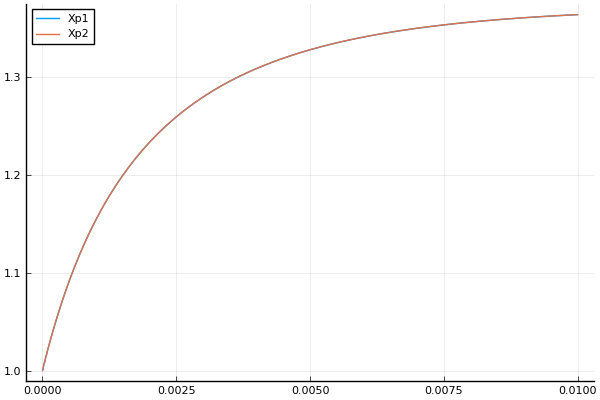

In [18]:
plot(thist,X1hist,label="Xp1")
plot!(thist,X2hist,label="Xp2")

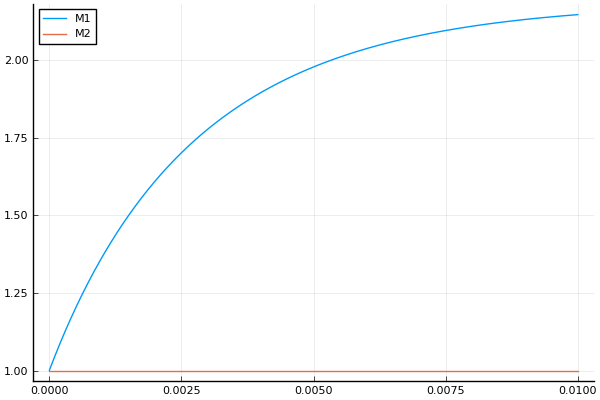

In [19]:
plot(thist,M1hist,label="M1")
plot!(thist,M2hist,label="M2")

## Compare the two results

In [20]:

plot(thist[1:end-1],real(X), xlim=(0.0,0.1), linestyle = :dash, linewidth=2.0, label="Xp analytical")
plot!(thist,Xhist, label="Xp numerical")

UndefVarError: UndefVarError: X not defined

In [21]:
X2hist[end]

1.3643575128608518

## When $X_0 = 0.1$, the error will be more evident as the dynamics from the numerical results become more nonlinear.  It is not shown below but you can set X0 = 0.1 to see it.